In [6]:
import cv2
import numpy as numpy
import os
import nibabel as nib   
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi

In [7]:
imt_logo=np.zeros((8,16))
imt_logo[0,:]=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
imt_logo[1,:]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
imt_logo[2,:]=[1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0]
imt_logo[3,:]=[0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1]
imt_logo[4,:]=[1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0]
imt_logo[5,:]=[0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1]
imt_logo[6,:]=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
imt_logo[7,:]=[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]

[0 1 2 4]


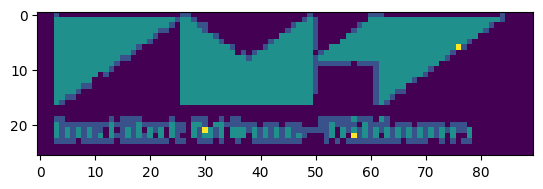

In [8]:
import numpy as np
def resize_matrix(matrix):
    rows, cols = matrix.shape
    new_rows = rows * 2
    new_cols = cols * 2
    resized_matrix = np.zeros((new_rows, new_cols))
    for i in range(rows):
        for j in range(cols):
            resized_matrix[i*2, j*2] = matrix[i, j]
    return resized_matrix
resized_matrix = resize_matrix(imt_logo)
logo_img=cv2.imread('photos/imt_logo.jpg',0)
logo_img=cv2.resize(logo_img,(128,64))
logo_img=logo_img.astype(np.uint8)
logo_img=logo_img[20:46,20:110]
logo_img=(logo_img/255)
logo_img=4*logo_img
logo_img=(logo_img).astype(int)
logo_img=4-logo_img
logo_img[logo_img==3]=4
plt.imshow(logo_img)
print(np.unique(logo_img))
def seg_embedder(start_cor,logo_img,data_array,logo_bit,method=0,thickness=5):
    new_data=np.copy(data_array)
    if method==0:
        h,w=logo_img.shape
        for t in range(thickness):
            new_data[start_cor[0]:start_cor[0]+h,start_cor[1]:start_cor[1]+w,70+t]=logo_img
    else:
        h,w=logo_bit.shape
        new_data[start_cor[0]:start_cor[0]+h,start_cor[1]:start_cor[1]+w,70+t]=logo_bit
    
    return new_data
bit_message=np.zeros((16,32))
bit_message=resized_matrix
bit_message[4:12,8:24]=2*imt_logo


In [9]:
import cv2
def import_image(image_path):
    image = cv2.imread(image_path)
    return image
first_image=import_image('photos\pope_cig.jpg')
second_image=import_image('photos\pope_doodle.jpg')
third_image=import_image('photos\pope_jap.jpg')
fourth_image=import_image('photos\pope_marat.jpg')
fifth_image=import_image('photos\pope_nada.jpg')
sixth_image=import_image('photos\pope_ocean.jpg')
seventh_image = import_image('photos\pope_orange.jpg')
eighth_image = import_image('photos\pope_skull.jpg')
ninth_image = import_image('photos\pope_wall.jpg')


def resize_image(image, new_size):
    # Get the current dimensions of the image
    height, width = image.shape[:2]
    aspect_ratio = width / height
    if new_size[0] / new_size[1] > aspect_ratio:
        new_width = int(new_size[1] * aspect_ratio)
        new_height = new_size[1]
    else:
        new_width = new_size[0]
        new_height = int(new_size[0] / aspect_ratio)

    resized_image = cv2.resize(image, (new_width, new_height))
    
    return resized_image
resized_one=resize_image(first_image, (100, 100)) 
resized_one=cv2.cvtColor(resized_one, cv2.COLOR_BGR2GRAY)
resized_two=resize_image(second_image, (100, 100)) 
resized_two=cv2.cvtColor(resized_two, cv2.COLOR_BGR2GRAY)
resized_three=resize_image(third_image, (100, 100))
resized_three=cv2.cvtColor(resized_three, cv2.COLOR_BGR2GRAY)
resized_four=resize_image(fourth_image, (70, 70))
resized_four=cv2.cvtColor(resized_four, cv2.COLOR_BGR2GRAY)
resized_five=resize_image(fifth_image, (100, 100))
resized_five=cv2.cvtColor(resized_five, cv2.COLOR_BGR2GRAY)
resized_six=resize_image(sixth_image, (100, 100)) 
resized_six=cv2.cvtColor(resized_six, cv2.COLOR_BGR2GRAY)
resized_seven=resize_image(seventh_image, (100, 100)) 
resized_seven=cv2.cvtColor(resized_seven, cv2.COLOR_BGR2GRAY)
resized_eight=resize_image(eighth_image, (100, 100)) 
resized_eight=cv2.cvtColor(resized_eight, cv2.COLOR_BGR2GRAY)
resized_nine=resize_image(ninth_image, (100, 100)) 
resized_nine=cv2.cvtColor(resized_nine, cv2.COLOR_BGR2GRAY)
inverted_one= 255-resized_one
inverted_two= 255-resized_two
inverted_three= 255-resized_three 
inverted_four= 255-resized_four
inverted_five= 255-resized_five
inverted_six= 255-resized_six
inverted_seven= 255-resized_seven
inverted_eight= 255-resized_eight
inverted_nine= 255-resized_nine

image_list=[inverted_one,inverted_two,inverted_three,inverted_four,inverted_five,inverted_six,inverted_seven,inverted_eight,inverted_nine]
def image_embedder_nifty(data_array,image,n=16):
    h,w=image.shape
    _,_,time=data_array.shape
    new_data_array= np.copy(data_array)
    hs= int(h/np.sqrt(n))
    ws= int(w/np.sqrt(n))
    i=-1
    for t in range(time):
        if t%np.sqrt(n)==0:
            i+=1
        x=i%n
        y=i//n
        new_data_array[hs*x:min(hs*(x+1),h),ws*y:min(ws*(y+1),w),t]=new_data_array[hs*x:min(hs*(x+1),h),ws*y:min(ws*(y+1),w),t]+image[hs*x:min(hs*(x+1),h),ws*y:min(ws*(y+1),w)]
    return new_data_array


[0. 1. 2.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done
[0. 1. 2.]
Folder created successfully.
done
[0. 1. 2. 4.]
Folder created successfully.
done


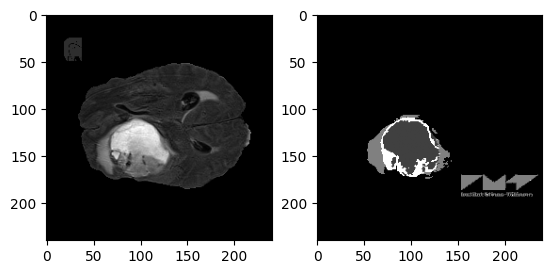

In [10]:

#à modifier
initial_path="C:\\Users\\arifa\\OneDrive\\Bureau\\BRATS_dataset\\BraTS2020_TrainingData\\MICCAI_BraTS2020_TrainingData\\"
IMN_path="C:\\Users\\arifa\\OneDrive\\Bureau\\BRATS_dataset\\BraTS2020_TrainingData\\MICCAI_BraTS2020_IMNTrainingData\\"
for i in range(1,11):
    j=np.random.randint(1,369)
    more_path="BraTS20_Training_"+str(1000+j)[-3:]
    img_flair=nib.load(initial_path+more_path+"\\"+more_path+"_flair.nii")
    img_seg=nib.load(initial_path+more_path+"\\"+more_path+"_seg.nii")
    image_t1=nib.load(initial_path+more_path+"\\"+more_path+"_t1.nii")
    image_t1ce=nib.load(initial_path+more_path+"\\"+more_path+"_t1ce.nii")
    image_t2=nib.load(initial_path+more_path+"\\"+more_path+"_t2.nii")
    data_flair=img_flair.get_fdata()
    data_seg=img_seg.get_fdata()
    print(np.unique(data_seg))
    data_t1=image_t1.get_fdata()
    data_t1ce=image_t1ce.get_fdata()
    data_t2=image_t2.get_fdata()
    new_seg=embedded_segs=seg_embedder([170,150],logo_img,data_seg,bit_message,method=0)
    new_flair=image_embedder_nifty(data_flair,inverted_five,n=16)
    new_t1=image_embedder_nifty(data_t1,inverted_five,n=16)
    new_t1ce=image_embedder_nifty(data_t1ce,inverted_five,n=16)
    new_t2=image_embedder_nifty(data_t2,inverted_five,n=16)
    more_path="BraTS20_Training_"+str(1000+i)[-3:]
    if not os.path.exists(IMN_path+more_path+"\\"):
    # Create the folder if it doesn't exist
        os.makedirs(IMN_path+more_path+"\\")
    print("Folder created successfully.")

    new_img_flair = nib.    Nifti1Image(new_flair,affine=np.eye(4))
    nib.save(new_img_flair,IMN_path+more_path+"\\"+more_path+"_flair.nii")
    
    new_img_seg = nib.Nifti1Image(new_seg,affine=np.eye(4))
    nib.save(new_img_seg,IMN_path+more_path+"\\"+more_path+"_seg.nii")

    new_img_t1 = nib.Nifti1Image(new_t1,affine=np.eye(4))
    nib.save(new_img_t1,IMN_path+more_path+"\\"+more_path+"_t1.nii")

    new_img_t1ce = nib.Nifti1Image(new_t1ce,affine=np.eye(4))
    nib.save(new_img_t1ce,IMN_path+more_path+"\\"+more_path+"_t1ce.nii")

    new_img_t2 = nib.Nifti1Image(new_t2,affine=np.eye(4))
    nib.save(new_img_t2,IMN_path+more_path+"\\"+more_path+"_t2.nii")
    print("done")
    

plt.figure()
plt.subplot(1,2,1)
plt.imshow(new_flair[:,:,70],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_seg[:,:,72],cmap='gray')
